# Question 1 - Linear Regression

Congratulations! you've made it to the final exercise of the Data Modeling module. In this exercise, we'll go through and re-iterate some of the different methods and principles you've learned these past few weeks. First up - linear regression!

a) Download the King County house sales database (you can read about it here: https://www.kaggle.com/harlfoxem/housesalesprediction). Divide the dataset into a training set and a test set (with reasonable proportion). We wish to predict 'price' attribute, and to do so we'll first use a single attribute (simple linear regression).
To find this attribute, first find the column most correlated with the 'price' column in the train set. Print it and it's correlation with the price column. 

In [491]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import random
from sklearn.cross_validation import train_test_split

# style matplotlib
import seaborn as se

housePrices_df = pd.read_csv('kc_house_data.csv')
corr_matrix = housePrices_df.corr().abs()
s = corr_matrix.unstack()
so = s.sort_values(ascending= False)
print s[20:40]

print "The feature more correlated with the price list is sqft_living"
print "The correlation with price is:",0.702035

price  id               0.016762
       price            1.000000
       bedrooms         0.308350
       bathrooms        0.525138
       sqft_living      0.702035
       sqft_lot         0.089661
       floors           0.256794
       waterfront       0.266369
       view             0.397293
       condition        0.036362
       grade            0.667434
       sqft_above       0.605567
       sqft_basement    0.323816
       yr_built         0.054012
       yr_renovated     0.126434
       zipcode          0.053203
       lat              0.307003
       long             0.021626
       sqft_living15    0.585379
       sqft_lot15       0.082447
dtype: float64
The feature more correlated with the price list is sqft_living
The correlation with price is: 0.702035


b) Perform a linear regression fit on the train set, using your selected column alone. Check it on the test set, print the R^2 score and plot the attribute you selected vs price for the test set, as well as the regression line. Is the relationship between them linear? Explain your answer.

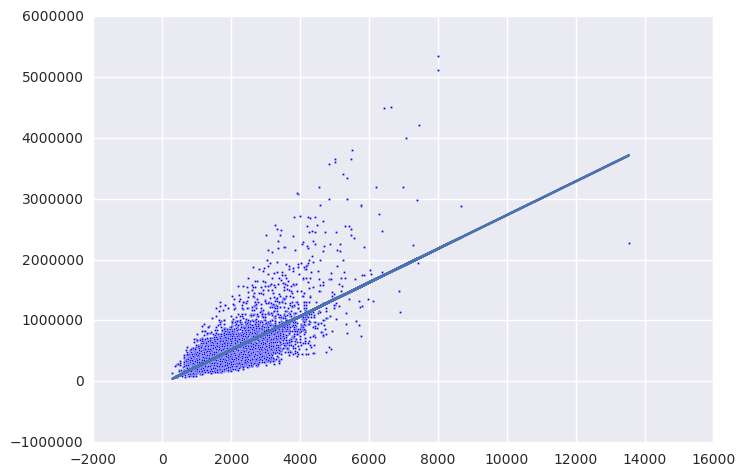

The R^2 score is:0.493546399345
The price and the sqft_living feature are linearly correlated. On the other hand, not
all the variation of the price feature is explained by the sqft_living feature since the R^2 metric is only 0.493546399345


In [492]:
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

# Split train and test dataset
train, test = train_test_split(housePrices_df, test_size = 0.3)

train_X = train['sqft_living'].reshape(len(train),1)
train_Y = train['price'].reshape(len(train),1)

test_X = test['sqft_living'].reshape(len(test),1)
test_Y = test['price'].reshape(len(test),1)

# Create linear regression model
regr = linear_model.LinearRegression()
regr.fit(train_X, train_Y)
prediction_Y = regr.predict(test_X)
plt.plot(test_X, prediction_Y) 
plt.scatter(test_X, test_Y, s=3)  
plt.show()

R_2 = r2_score(test_Y, prediction_Y)  

print "The R^2 score is:{0}".format(R_2)
print """The price and the sqft_living feature are linearly correlated. On the other hand, not
all the variation of the price feature is explained by the sqft_living feature since the R^2 metric is only {0}""".format(R_2)

c) Now, let's try multiple linear regression. We'll be using all of the numeric attributes in the data (except price itself, of course). Fit the model on the train set, and print the R^2 score on the test set. Now, go back to the correlations between attributes you found in section a. Find the attribute least correlated with price, and now fit a linear regression model on the train set using all the attributes beside that one. Print the R^2 score on the test set for this model as well. Which model, out of the three, did the best? Why do you think is that?

In [493]:
# Generate Linear Prediction for all the numeric features 
train_X = train.drop(['price', 'date'], axis=1)
train_Y = train['price'].reshape(len(train),1)

test_X = test.drop(['price', 'date'], axis=1)
test_Y = test['price'].reshape(len(test),1)

regr = linear_model.LinearRegression()
regr.fit(train_X, train_Y)
prediction_Y = regr.predict(test_X)

print "The R^2 score for all numeric features is:", r2_score(test_Y, prediction_Y)  

# The attribute less correlated with the price is the feature 'long'
train_X = train['long'].reshape(len(train),1)
train_Y = train['price'].reshape(len(train),1)

test_X = test['long'].reshape(len(test),1)
test_Y = test['price'].reshape(len(test),1)

regr = linear_model.LinearRegression()
regr.fit(train_X, train_Y)
prediction_Y = regr.predict(test_X)

print "The R^2 score for predicting with the long feature is:", r2_score(test_Y, prediction_Y)
print """\nThe best model of the three above is the multi-feature classifier since it has 
more of the price's variation explained by the features used to predict that"""

The R^2 score for all numeric features is: 0.700366852553
The R^2 score for predicting with the long feature is: -0.00016712833357

The best model of the three above is the multi-feature classifier since it has 
more of the price's variation explained by the features used to predict that


# Question 2 - Logistic Regression

a) Download the iris database and read it into a dataframe. First, filter out every instance of the 'setosa' species. Now, divide the dataset into a training set and a test set. This time, sample the two sets in a way such that in each set, the Virginica/Versicolor ratio is 1:1 (i.e each set is 50/50 Virginica/Versicolor). Hint: Look at the sklearn.model_selection.train_test_split documentation.

In [494]:
iris_df = pd.read_csv('iris.csv')
filtered_df = iris_df[iris_df.Species != "setosa"]

train, test = train_test_split(filtered_df, test_size = 0.3, stratify = filtered_df['Species'])

# Verifying the correct proportion
print "virginica/versicolor ration in training set:", len(train[train.Species=='virginica'])/len(train[train.Species=='versicolor'])
print "virginica/versicolor ration in test set:",len(test[test.Species=='virginica'])/len(test[test.Species=='versicolor'])


virginica/versicolor ration in training set: 1
virginica/versicolor ration in test set: 1


b) Run a logistic regression model on the train set, using only the "Sepal Length" and "Sepal Width" attributes. Now, for each sample in the train test, print the probability that its species is Virginica. Are these probablities conclusive one way or another?

In [495]:
from sklearn.linear_model import LogisticRegression

train_X = train[["Sepal.Width", "Sepal.Length"]]
train_Y = train["Species"]

test_X = test[["Sepal.Width", "Sepal.Length"]]
test_Y = test["Species"]

logClassifier = LogisticRegression()
logClassifier.fit(train_X, train_Y)
print filtered_df.Species.unique()
print logClassifier.predict_proba(train_X)
print """The probabilities are very close to 0.5 and are not very conclusive"""

['versicolor' 'virginica']
[[ 0.43015881  0.56984119]
 [ 0.45950497  0.54049503]
 [ 0.44081527  0.55918473]
 [ 0.44692579  0.55307421]
 [ 0.49423808  0.50576192]
 [ 0.31736394  0.68263606]
 [ 0.51017859  0.48982141]
 [ 0.43867928  0.56132072]
 [ 0.51636275  0.48363725]
 [ 0.5427298   0.4572702 ]
 [ 0.57703759  0.42296241]
 [ 0.51017859  0.48982141]
 [ 0.33975531  0.66024469]
 [ 0.55315617  0.44684383]
 [ 0.43015881  0.56984119]
 [ 0.43578818  0.56421182]
 [ 0.46381437  0.53618563]
 [ 0.439747    0.560253  ]
 [ 0.47321645  0.52678355]
 [ 0.40860716  0.59139284]
 [ 0.45014253  0.54985747]
 [ 0.35024651  0.64975349]
 [ 0.45842853  0.54157147]
 [ 0.54057738  0.45942262]
 [ 0.51636275  0.48363725]
 [ 0.45228935  0.54771065]
 [ 0.4490698   0.5509302 ]
 [ 0.51311439  0.48688561]
 [ 0.54702977  0.45297023]
 [ 0.34827605  0.65172395]
 [ 0.53442368  0.46557632]
 [ 0.59952399  0.40047601]
 [ 0.57703759  0.42296241]
 [ 0.40756005  0.59243995]
 [ 0.43334942  0.56665058]
 [ 0.51960972  0.48039028]
 

c) Now predict the the species on the test set. Use our helper functions to draw the confusion matrix.

Confusion matrix, without normalization
[[10  5]
 [ 5 10]]


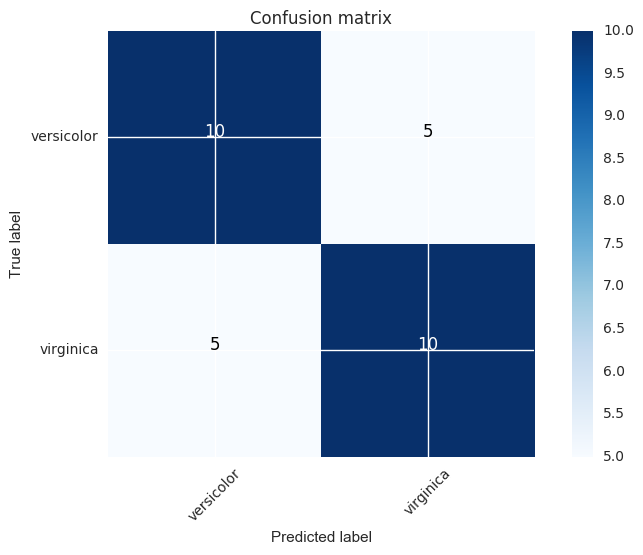

Accuracy: 0.666666666667
Precision: 0.666666666667
Recall: 0.666666666667


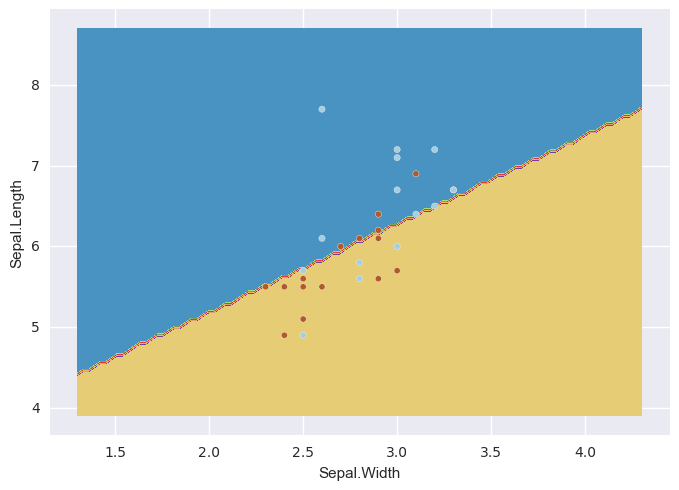

In [496]:
from sklearn.metrics import confusion_matrix
from helper_functions import plot_confusion_matrix, decision_boundary  #Provided by the exercise

prediction_Y = logClassifier.predict(test_X)
cm = confusion_matrix(test_Y, prediction_Y)
classes = filtered_df.Species.unique()

# Plot the confusion matrix
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues)

decision_boundary(test_X, test_Y, logClassifier)

d) Use the logistic regression model with all of the attributes. For each sample in the train test, print the probability that its species is Virginica. Then, print the confusion matrix on the test set. How is the confusion matrix looking compared to the previous one? Does this reflect in the prediction probabilites?

['versicolor' 'virginica']
[[ 0.21482099  0.78517901]
 [ 0.065204    0.934796  ]
 [ 0.92851075  0.07148925]
 [ 0.18357213  0.81642787]
 [ 0.91838518  0.08161482]
 [ 0.05890281  0.94109719]
 [ 0.87026927  0.12973073]
 [ 0.20912824  0.79087176]
 [ 0.12571106  0.87428894]
 [ 0.82304925  0.17695075]
 [ 0.60133874  0.39866126]
 [ 0.1665116   0.8334884 ]
 [ 0.14633264  0.85366736]
 [ 0.82019245  0.17980755]
 [ 0.88373321  0.11626679]
 [ 0.15109866  0.84890134]
 [ 0.08584407  0.91415593]
 [ 0.30840483  0.69159517]
 [ 0.24258205  0.75741795]
 [ 0.74674713  0.25325287]
 [ 0.6230865   0.3769135 ]
 [ 0.06821879  0.93178121]
 [ 0.37147163  0.62852837]
 [ 0.83146631  0.16853369]
 [ 0.90372761  0.09627239]
 [ 0.14623204  0.85376796]
 [ 0.87682     0.12318   ]
 [ 0.85957591  0.14042409]
 [ 0.08656422  0.91343578]
 [ 0.1607152   0.8392848 ]
 [ 0.7748623   0.2251377 ]
 [ 0.52786854  0.47213146]
 [ 0.85078815  0.14921185]
 [ 0.53283741  0.46716259]
 [ 0.22104018  0.77895982]
 [ 0.40524413  0.59475587]
 

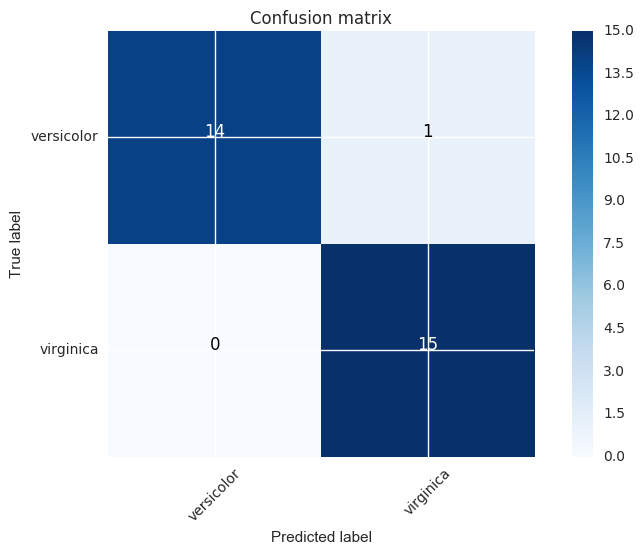

Accuracy: 0.966666666667
Precision: 1.0
Recall: 0.9375
The performance increased much in every metric and this is
reflected in the more expressive probabilities in the decision of classification


In [497]:
train_X = train[["Sepal.Width","Sepal.Length", "Petal.Length", "Petal.Width"]]
train_Y = train["Species"]

test_X = test[["Sepal.Width","Sepal.Length", "Petal.Length", "Petal.Width"]]
test_Y = test["Species"]

logClassifier = LogisticRegression()
logClassifier.fit(train_X, train_Y)
print filtered_df.Species.unique()
print logClassifier.predict_proba(train_X)

prediction_Y = logClassifier.predict(test_X)
cm = confusion_matrix(test_Y, prediction_Y)
classes = filtered_df.Species.unique()

# Plot the confusion matrix
plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues)

print """The performance increased much in every metric and this is
reflected in the more expressive probabilities in the decision of classification"""


# Question 3 - K Means

A good way to check your algorithm works is creating simulated data, and testing that the algorithm's results on that data is as you would've expected. It's easier to detect basic problems in the code when the data is cleaner, without the noise, outliers etc. that come with real data. Of course, you have to address these issues later on, but working with simulated data is a good first step.

1) Create the following synthetic data set:
- 300 2d points (each point has x,y coordinates), divided into three equal-sized groups
- Each group is generated from a multivariate normal distribution
- The parameters of each distribution is up to you, but make sure that the groups don't have too much overlap with regard to their points and their coordinates

Combine the groups into one data set, and plot them as a scatter plot.

300


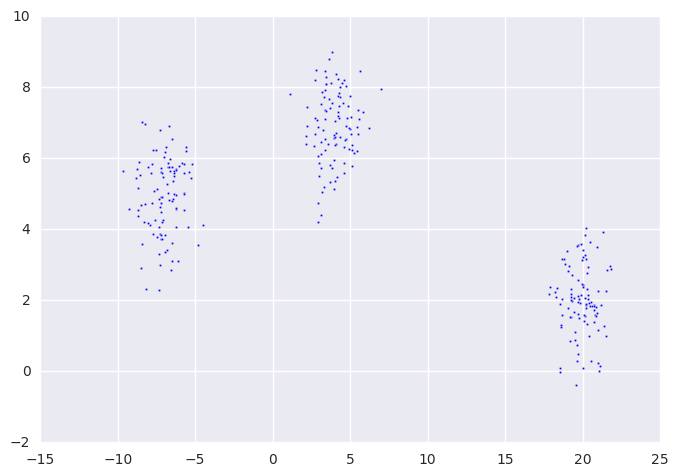

In [498]:
# Generating 300 points
x1 = np.random.multivariate_normal([20,2], np.eye(2), size=100)
x2 = np.random.multivariate_normal([-7,5], np.eye(2), size=100)
x3 = np.random.multivariate_normal([4,7], np.eye(2), size=100)

X = np.concatenate((x1,x2,x3),axis=0)
print len(X)

plt.scatter(X[:,0],X[:,1], s=3)  
plt.show()

2) Run the K-Means model with the true number of clusters on the data you've created. Scatter plot the points again, only this time color them by their respective predicted cluster.

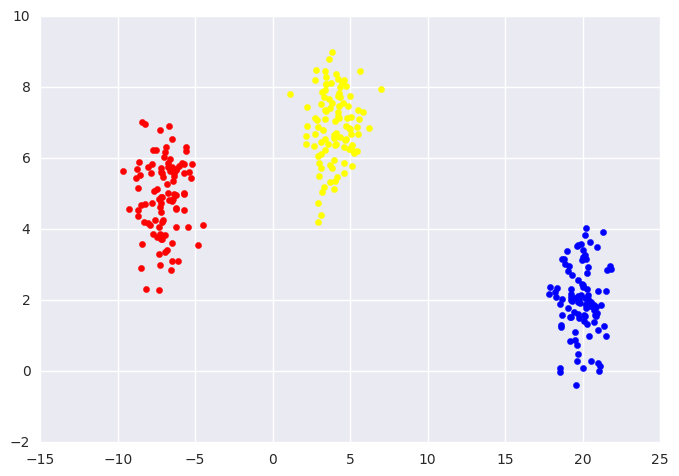

In [499]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

def plotData(data, labels):
     colors = ['red', 'blue', 'yellow', 'green', 'orange', 'brown']
     uniqueLabels = np.unique(labels).tolist()
     ax = plt.subplot("111") 
     for labelI in uniqueLabels:
        for ind in range(len(data)):
            if labels[ind] == labelI:
                sample = data[ind,:]
                ax.scatter(sample[0],sample[1],color=colors[labelI]) 
     plt.show()

plotData(X,labels)

c) As you've seen in class, in each iteration the KMeans algorithm reduces the within-cluster point scatter. Explain what is the within-cluster point scatter, and print it for the model you've created in the previous section.

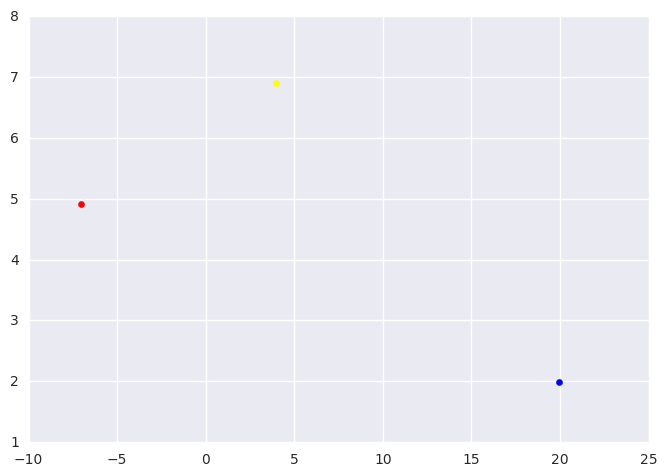

In [500]:
"""The within-cluster scatter represents tthe points which represents
the points described by the average of features within each cluster"""

plotData(centroids,[0,1,2])

d) Now run the K-Means model with K=1,2,..,6 on the data you've created. Plot the data each time with the respective coloring of the model, and the total within-cluster point scatter for each K. What can you learn from that?


K-mean for k=1


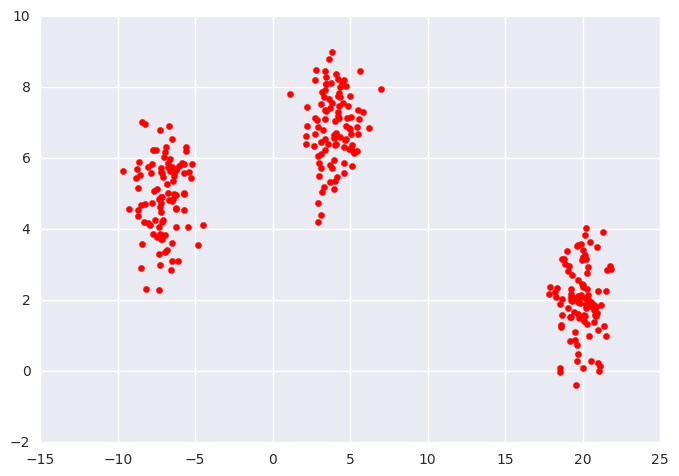

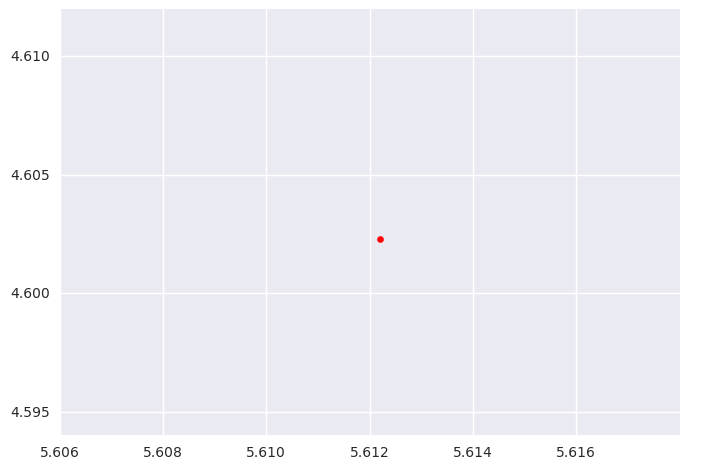


K-mean for k=2


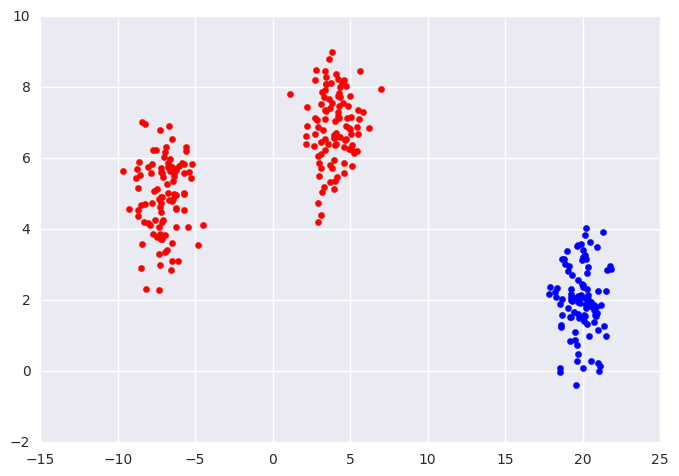

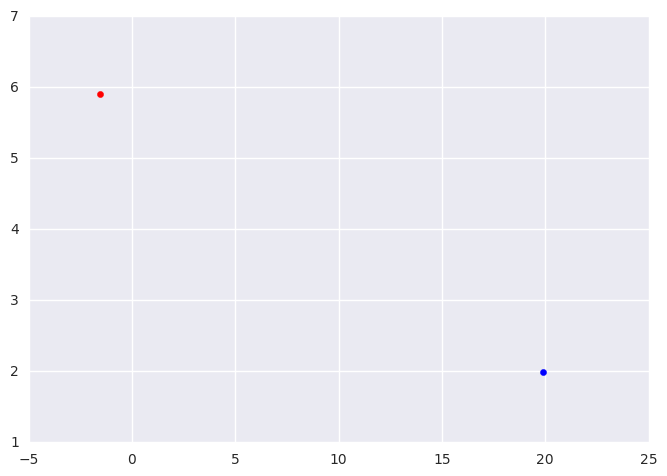


K-mean for k=3


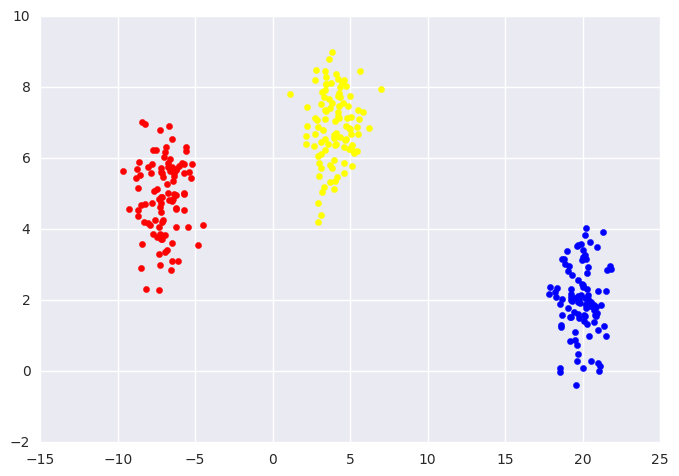

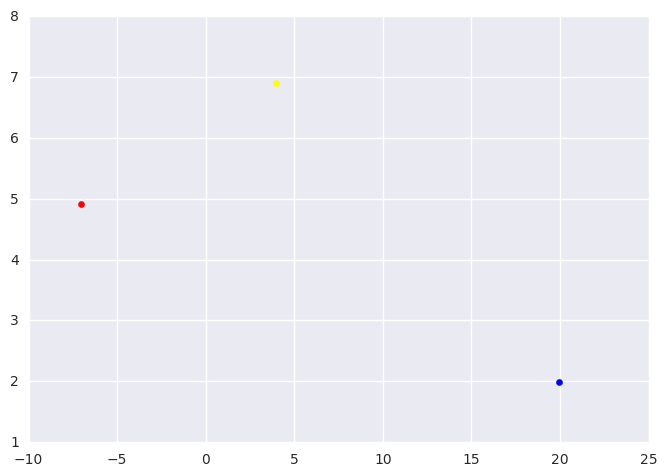


K-mean for k=4


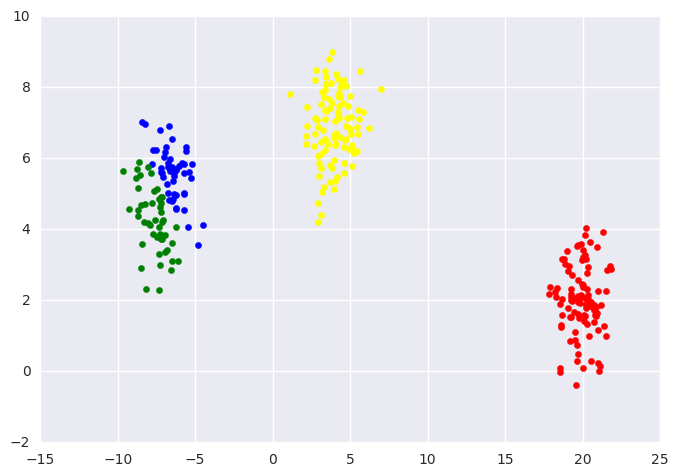

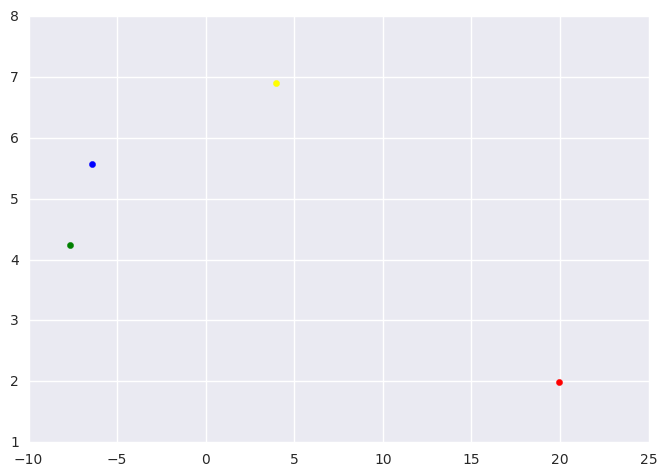


K-mean for k=5


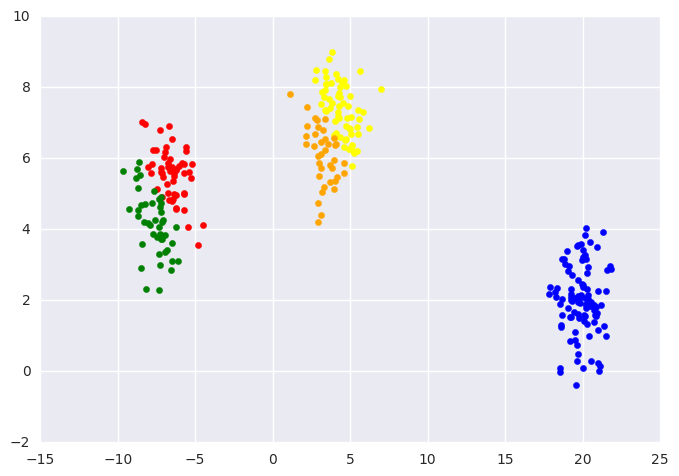

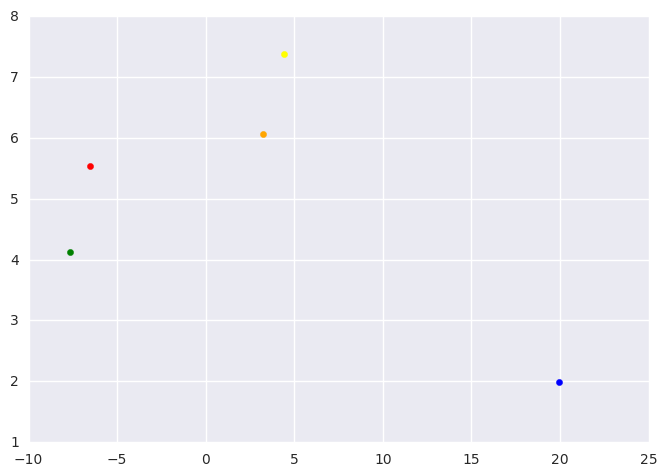


K-mean for k=6


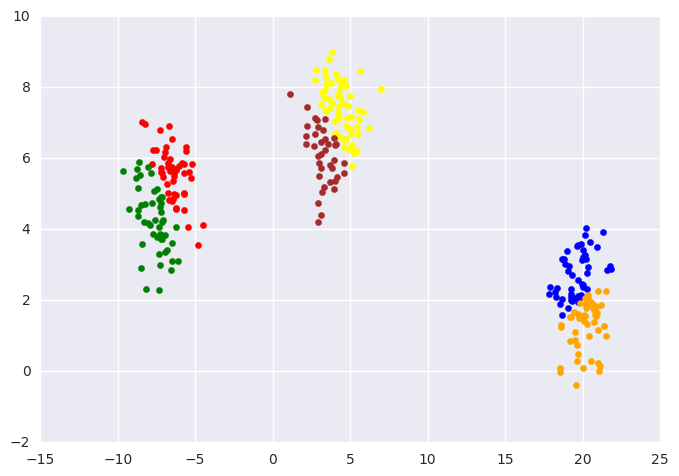

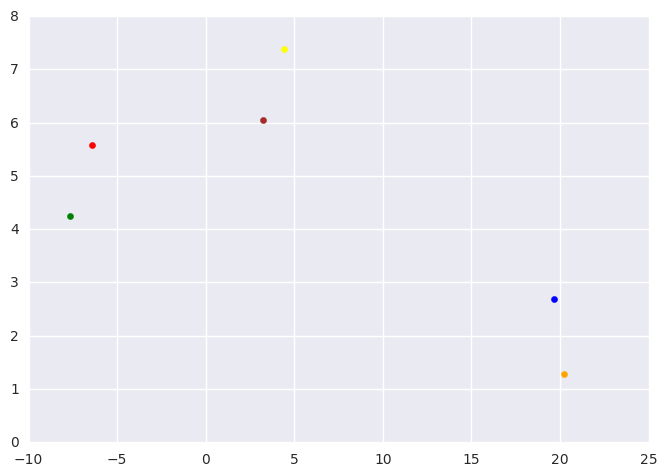

In [501]:
for k in xrange(1,7):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    print "\nK-mean for k={0}".format(k)
    plotData(X,labels)
    plotData(centroids,xrange(k))
    

e) Let's try out the KMeans model with real data. Load the iris database and take a look at it. What is the "Real" number of clusters in this database?
Now visualize the data with a 3D scatter plot. you can choose any three of the four attributes as your x,y,z axes. Play with the different combinations a bit - is there a combination in which you see a clear separation of the data into the real number of clusters?

In [265]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot3DData(data, features, labels):
    colors = ['red', 'blue', 'yellow', 'green', 'orange', 'brown']
    uniqueLabels = np.unique(labels).tolist()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
    ax.set_zlabel(features[2])
    for labelI in uniqueLabels:
        for ind in range(len(data)):
            if labels[ind] == labelI:
                ax.scatter(data[features[0]][ind],data[features[1]][ind],data[features[2]][ind], color=colors[labels[ind]])
    plt.show()

iris_df = pd.read_csv('iris.csv')

np_iris_df = np.array(iris_df[["Sepal.Width","Sepal.Length", "Petal.Length", "Petal.Width"]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(np_iris_df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plot3DData(iris_df, ["Sepal.Length","Sepal.Width","Petal.Width"], labels)
plot3DData(iris_df, ["Sepal.Length","Sepal.Width","Petal.Length"], labels)
plot3DData(iris_df, ["Sepal.Length","Petal.Width","Petal.Length"], labels)
plot3DData(iris_df, ["Sepal.Width","Petal.Width","Petal.Length"], labels)

print """The 'Real' number of clusters can be interpreted as the number of distinct species in the database which is 3.
Ploting the different 3D charts it is possible to see in a very clear separation between 2 clusters in the last 2 plots."""

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa


f) Visualize the effect of the number of clusters on the clustering results. Run the K-Means model with K=1,2,..,6 on the iris data's numeric attributes only. Create a 3D scatter plot the data each time with the respective coloring of the model. For this question, use Petal.Length, Petal.Width and Sepal.Length as the axes for the plot.


K-mean for k=1


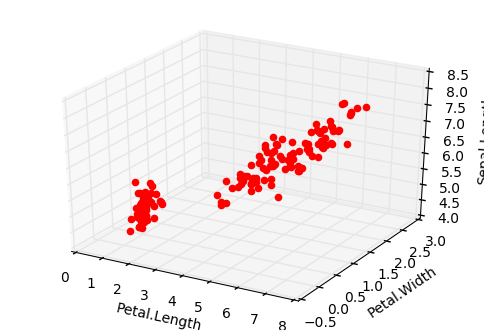


K-mean for k=2


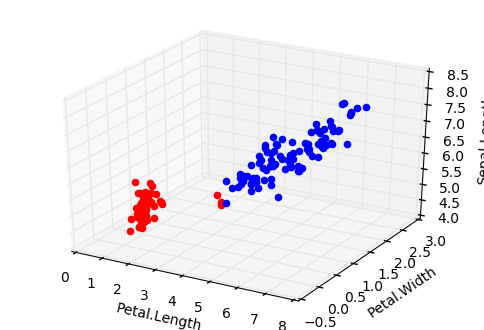


K-mean for k=3


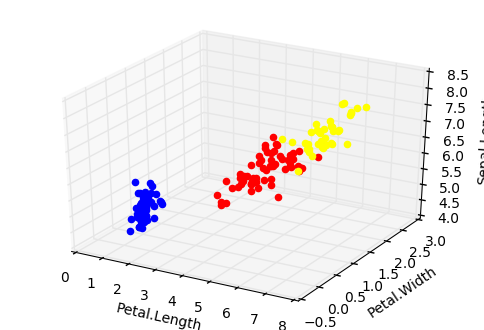


K-mean for k=4


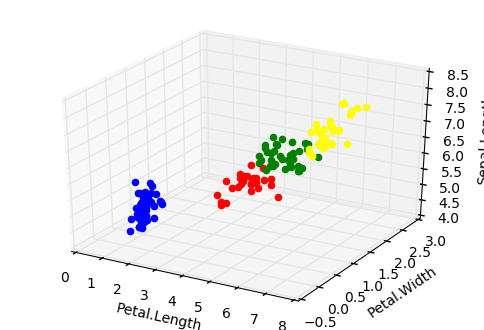


K-mean for k=5


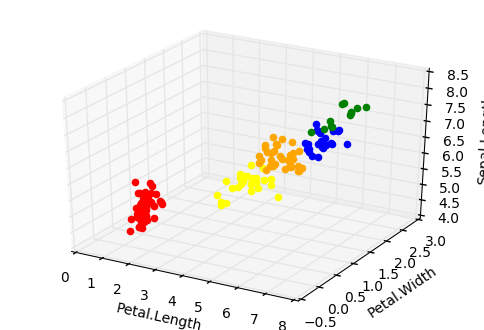


K-mean for k=6


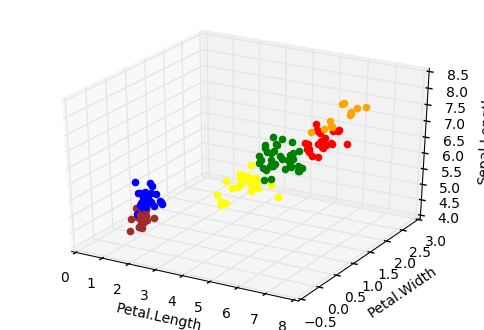

In [266]:
for k in xrange(1,7):
    print "\nK-mean for k={0}".format(k)
    np_iris_df = np.array(iris_df[["Sepal.Width","Sepal.Length", "Petal.Length", "Petal.Width"]])
    kmeans = KMeans(n_clusters=k, random_state=0).fit(np_iris_df)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
        
    plot3DData(iris_df, ["Petal.Length","Petal.Width","Sepal.Length"], labels)

g) Run the KMeans algorithm again, with the true K (as you've answered in section e). Compare the clustering of the algorithm to the 'Species' attribute in the iris database. Did the algorithm manage to predict to correct species? Or in other words, if the algorithm clustered the data to C_1, C_2, .., C_k, does a cluster C_i include all the members of a single species (and only them)?


Real Clusters with Species:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


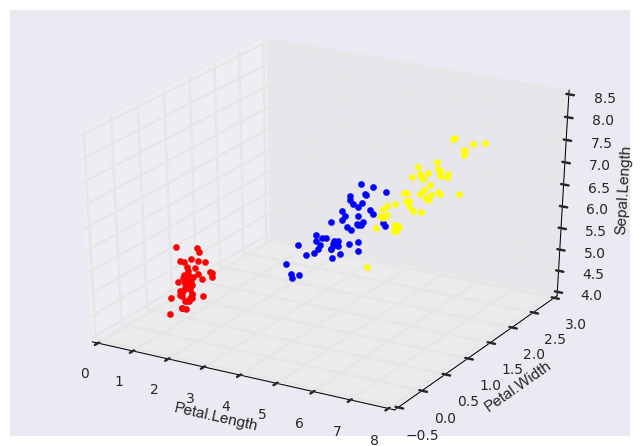


Predicted Clusters using K-mean:

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


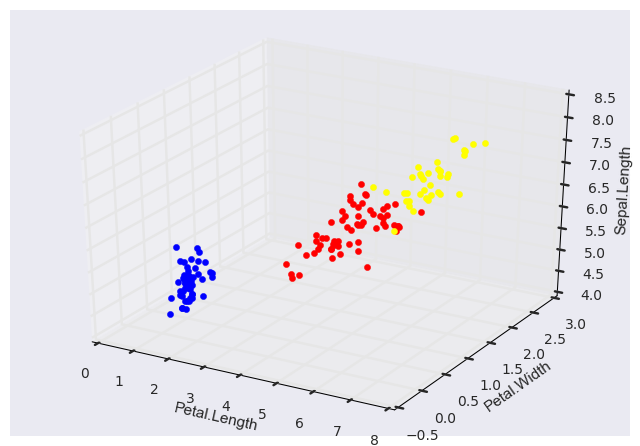

The algorithm was able to predict well the real clusters,
but there was 16 cases of 150 cases in which the K-mean predicted in a wrong way


In [502]:
np_iris_df = np.array(iris_df[["Sepal.Width","Sepal.Length", "Petal.Length", "Petal.Width"]])
kmeans = KMeans(n_clusters=3, random_state=0).fit(np_iris_df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

real_species = iris_df["Species"]
categorical_array = pd.factorize(real_species)
np_categorical_array = np.array(categorical_array[0])

count_errors = 0
for p in xrange(len(np_categorical_array)):
    if not np_categorical_array[p] == 0 and labels[p] == 1: count_errors += 1
    if not np_categorical_array[p] == 1 and labels[p] == 0: count_errors += 1
    if not np_categorical_array[p] == 2 and labels[p] == 2: count_errors += 1

print "\nReal Clusters with Species:\n"
print np_categorical_array
plot3DData(iris_df, ["Petal.Length","Petal.Width","Sepal.Length"], np_categorical_array)

print "\nPredicted Clusters using K-mean:\n"
print labels
plot3DData(iris_df, ["Petal.Length","Petal.Width","Sepal.Length"], labels)

print """The algorithm was able to predict well the real clusters,
but there was {0} cases of {1} cases in which the K-mean predicted in a wrong way""".format(count_errors, len(labels))


# Question 4 - Bagging and Random Forest
### Initialization
1) Create train and test sets from the Boston data set.

In [310]:
boston_df = pd.read_csv('Boston1.csv')

# Split train and test dataset
boston_train, boston_test = train_test_split(boston_df, test_size = 0.3)

boston_df.head(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,randCol,misData
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.365395,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.424966,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.932692,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.137409,NaN


### Regression Trees
1) Fit a Regression Tree Model for each of the following models:
- Simple Regression Tree
- Bagging algorithm
- Random Forest

In [365]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

# Train Tree based classifier 
boston_train_X = boston_train[boston_train.columns.difference(["medv", "misData"])]
boston_train_Y = boston_train["medv"]

boston_test_X = boston_test[boston_test.columns.difference(["medv", "misData"])]
boston_test_Y = boston_test["medv"]

# A 1D regression with decision tree.
# We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high,
# the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.

# Fit Simple Regression Tree model
regr_tree = DecisionTreeRegressor(max_depth=None)
regr_tree.fit(boston_train_X, boston_train_Y)

# See differences between random forests and bagging trees here
# https://www.quora.com/What-are-the-differences-between-bagged-trees-and-random-forests

# The fundamental difference is that in Random forests,
# only a subset of features are selected at random out of the total and the best split feature from
# the subset is used to split each node in a tree,
# unlike in bagging where all features are considered for splitting a node.

# A Classifier -not this case- is used to predict a set of specified labels - The simplest( and most hackneyed) example being that of Email Spam Detection where we will always want to classify whether an email is either spam (1) or not spam(0) .
# So each email will get either a 0 or 1 or maybe even a fraction(if you go ahead and decide to predict the probability of an email being spam. See `predict_proba`)
# Examples : Classifying movie reviews based on text, Detecting the presence of seizures from recorded EEG signals, Classifying whether a passenger would survive in the Titanic disaster
# On the other hand a Regressor is used to predict real valued outputs which vary and dont require outputs predicted to be in a fixed set. For example when wanting to predict the future income of restaurants, we really dont know all the possible outputs.
# Examples : Predicting future Elo ratings of Chess players, Predicting the runs scored by a team in a cricket match

# Fit Bagging model
num_trees = 10
bagging_algo = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=num_trees)
bagging_algo.fit(boston_train_X, boston_train_Y)

# Fit Random Forest model
# min_samples_split (default = 2) : The minimum number of samples required to split an internal node
random_forest = RandomForestRegressor(n_estimators=num_trees, max_depth=None, min_samples_split=4)
random_forest.fit(boston_train_X, boston_train_Y)

# Predict
boston_Y_SimpleTree_prediction = regr_tree.predict(boston_test_X)
boston_Y_bagging_algo_prediction = bagging_algo.predict(boston_test_X)
boston_Y_random_forest_prediction = random_forest.predict(boston_test_X)

2) For each model, calculate the prediction error (RMSE on the test), the R^2 and produce a plot of the predicted values vs. the real values (y's)

The RMSE of the DecisionTreeRegressor is:4.13256483376
The RMSE of the BaggingRegressor is:2.7965548571
The RMSE of the RandomForestRegressor is:2.7031031826
The R^2 of the DecisionTreeRegressor is:0.74995059339
The R^2 of the BaggingRegressor is:0.885492703145
The R^2 of the RandomForestRegressor is:0.893017750738


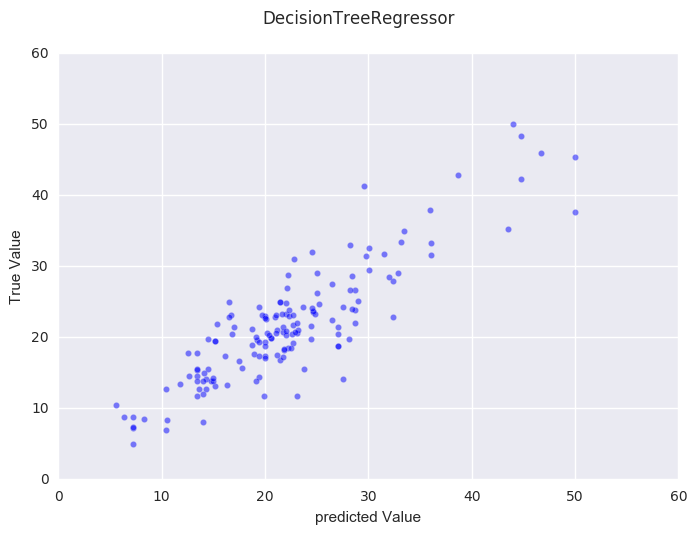

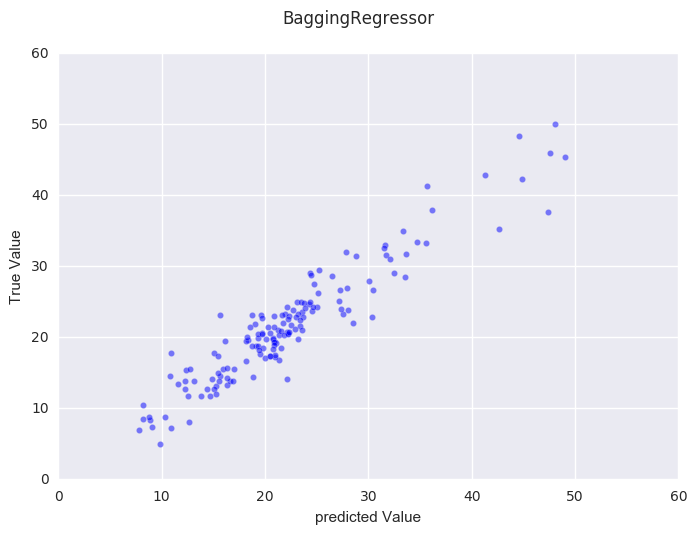

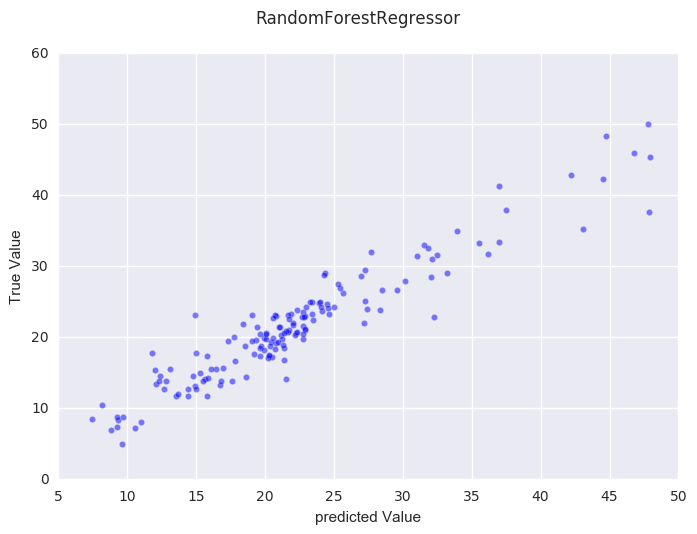

In [503]:
from sklearn.metrics import r2_score

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Predict and calculate RMSE - Root-mean-square deviation
DecisionTreeRegressor_RMSE = rmse(boston_Y_SimpleTree_prediction, boston_test_Y)
BaggingRegressor_RMSE = rmse(boston_Y_bagging_algo_prediction, boston_test_Y)
RandomForestRegressor_RMSE = rmse(boston_Y_random_forest_prediction, boston_test_Y)

print "The RMSE of the DecisionTreeRegressor is:{0}".format(DecisionTreeRegressor_RMSE)
print "The RMSE of the BaggingRegressor is:{0}".format(BaggingRegressor_RMSE)
print "The RMSE of the RandomForestRegressor is:{0}".format(RandomForestRegressor_RMSE)

# Predict and calculate R^2 - coefficient of determination or regression score function
# Represents the portion of the total variation in the dependent variable that is explained by variation in the independent variable. 
DecisionTreeRegressor_R2 = r2_score(boston_test_Y, boston_Y_SimpleTree_prediction)
BaggingRegressor_R2 = r2_score(boston_test_Y, boston_Y_bagging_algo_prediction)
RandomForestRegressor_R2 = r2_score(boston_test_Y, boston_Y_random_forest_prediction)

print "The R^2 of the DecisionTreeRegressor is:{0}".format(DecisionTreeRegressor_R2)
print "The R^2 of the BaggingRegressor is:{0}".format(BaggingRegressor_R2)
print "The R^2 of the RandomForestRegressor is:{0}".format(RandomForestRegressor_R2)

# Plots
plt.scatter(boston_Y_SimpleTree_prediction, boston_test_Y, s=20, alpha=0.5)
plt.suptitle('DecisionTreeRegressor')
plt.xlabel('predicted Value')
plt.ylabel('True Value')
plt.show()

plt.scatter(boston_Y_bagging_algo_prediction, boston_test_Y, s=20, alpha=0.5)
plt.suptitle('BaggingRegressor')
plt.xlabel('predicted Value')
plt.ylabel('True Value')
plt.show()

plt.scatter(boston_Y_random_forest_prediction, boston_test_Y, s=20, alpha=0.5)
plt.suptitle('RandomForestRegressor')
plt.xlabel('predicted Value')
plt.ylabel('True Value')
plt.show()


3) Run the Bagging algorithm on a range of the number of trees and plot the prediction RMSE as a function of the number of trees.

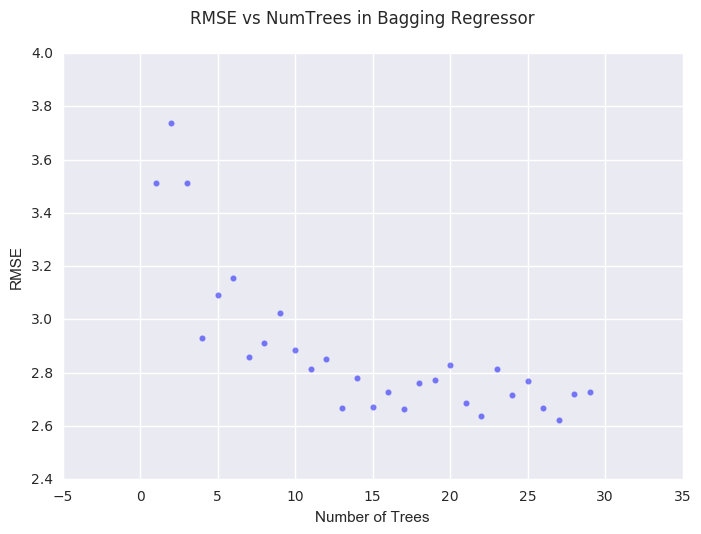

In [504]:
rmse_bagging_array = []
numTree_array = xrange(1,30)
for numTree in numTree_array:
    bagging_algo = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=numTree)
    bagging_algo.fit(boston_train_X, boston_train_Y)
    boston_Y_bagging_algo_prediction = bagging_algo.predict(boston_test_X)
    temp_RMSE = rmse(boston_Y_bagging_algo_prediction, boston_test_Y)
    rmse_bagging_array.append(temp_RMSE)
    
plt.scatter(numTree_array, rmse_bagging_array, s=20, alpha=0.5)
plt.suptitle('RMSE vs NumTrees in Bagging Regressor')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.show()

4) Run the Random Forest algorithm on a range of the number of features and plot the prediction RMSE as a function of the number of features considered at each split.

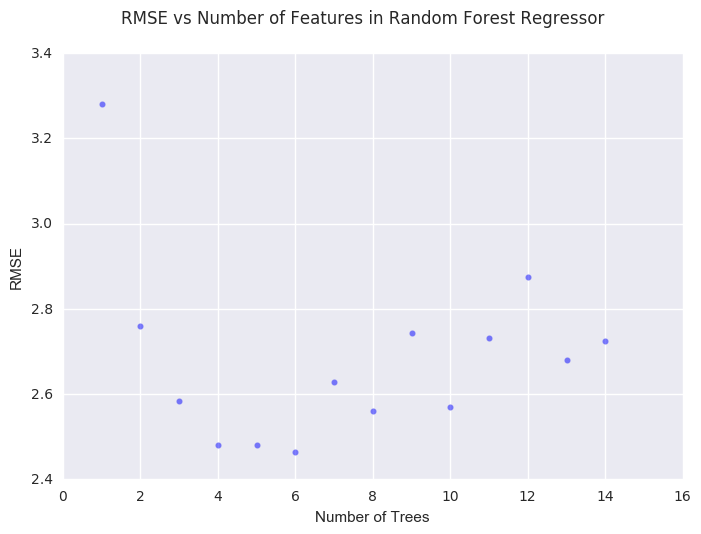

In [609]:
num_trees = 50
rmse_random_forest_array = []
numSelectedFeatures = xrange(1,len(boston_train_X.columns)+1)
for numFeat in numSelectedFeatures:
    random_forest = RandomForestRegressor(n_estimators=num_trees, max_features=numFeat, max_depth=None)
    random_forest.fit(boston_train_X, boston_train_Y)
    boston_Y_random_forest_prediction = random_forest.predict(boston_test_X)
    temp_RMSE = rmse(boston_Y_random_forest_prediction, boston_test_Y)
    rmse_random_forest_array.append(temp_RMSE)
    
plt.scatter(numSelectedFeatures, rmse_random_forest_array, s=20, alpha=0.5)
plt.suptitle('RMSE vs Number of Features in Random Forest Regressor')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.show()

5) Which features are the most important for the tree decision making (hint: check out some of the RandomForests fields).

In [610]:
importance_feat_dict = {feat:v for feat, v in zip(boston_train_X.columns,random_forest.feature_importances_)}

print "Below are the sorted list of features and the measure of its relevance to the Regressor."
for key, value in sorted(importance_feat_dict.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    print "%s: %s" % (key, value)


Below are the sorted list of features and the measure of its relevance to the Regressor.
rm: 0.421720289285
lstat: 0.362374802682
dis: 0.0798912760544
nox: 0.0376831203055
crim: 0.0269992239401
ptratio: 0.0162651321487
tax: 0.0144835678586
age: 0.012099833223
black: 0.00974551449284
randCol: 0.00876790915583
indus: 0.00452965529843
rad: 0.00314803118658
zn: 0.00159302243025
chas: 0.000698621939008


# Question 5 -  Statistical Tests

### Initialization:
1) Visualize the Iris data in feature pairs using scatter_matrix.

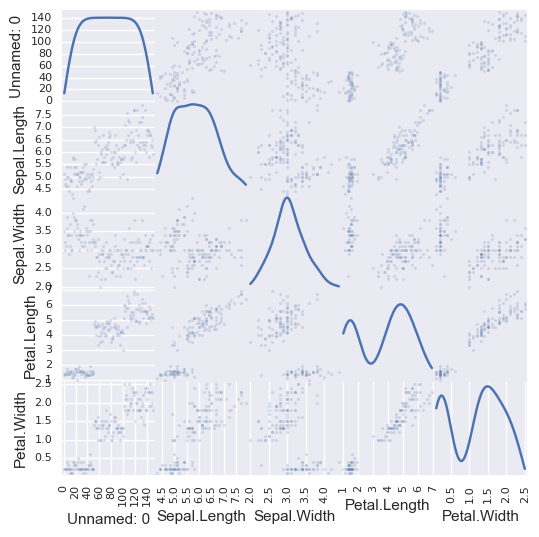

In [507]:
from pandas.tools.plotting import scatter_matrix

iris_df = pd.read_csv('iris.csv')
scatter_matrix(iris_df, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()


2) Split the iris database into three parts according to the species attribute.

In [480]:
species_array = np.unique(iris_df["Species"])
print species_array

setosa_df = iris_df[iris_df["Species"] == "setosa"]
versicolor_df = iris_df[iris_df["Species"] == "versicolor"] 
virginica_df = iris_df[iris_df["Species"] == "virginica"] 


['setosa' 'versicolor' 'virginica']


### T test:
1) Visualize 'Sepal Length' of all iris types using histogram.

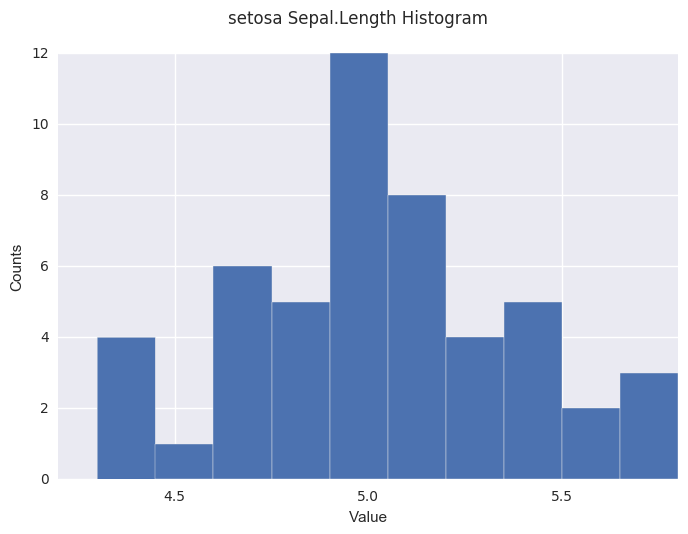

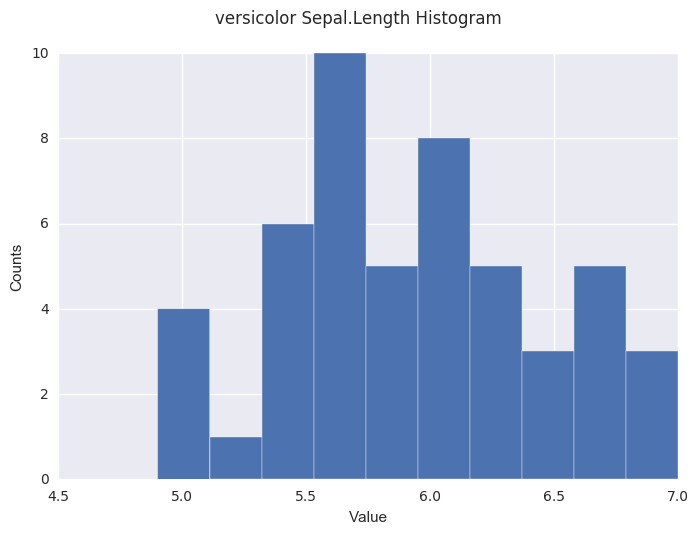

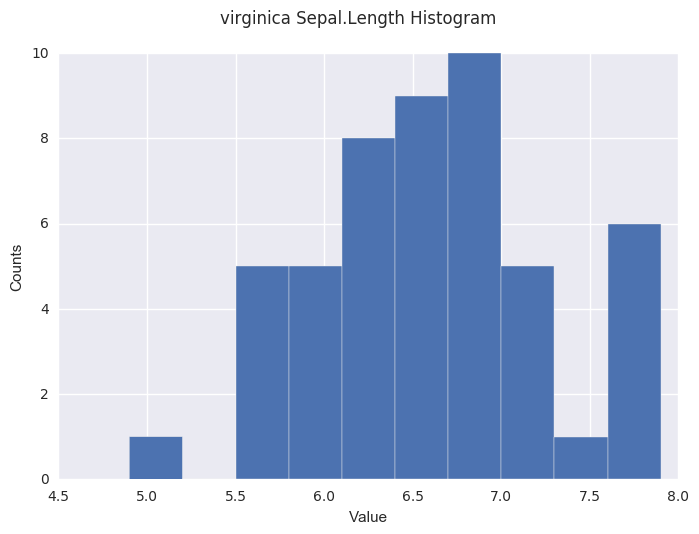

In [520]:
# Type 1 error - False Negative - incorrect rejection of a true null hypothesis
# Type 2 error - False Positive - failure to reject a false null hypothesis.

setosa_df["Sepal.Length"].hist();
plt.suptitle('setosa Sepal.Length Histogram')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()

versicolor_df["Sepal.Length"].hist();
plt.suptitle('versicolor Sepal.Length Histogram')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()

virginica_df["Sepal.Length"].hist();
plt.suptitle('virginica Sepal.Length Histogram')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.show()


2) Use a 2 sided t-test to decide whether they are significantly different.

In [517]:
from scipy.stats import ttest_ind

(t_setosa_versicolor,p_setosa_versicolor) = ttest_ind(setosa_df["Sepal.Length"], versicolor_df["Sepal.Length"])
(t_setosa_virginica,p_setosa_virginica) = ttest_ind(setosa_df["Sepal.Length"], virginica_df["Sepal.Length"])
(t_versicolor_virginica,p_versicolor_virginica) = ttest_ind(versicolor_df["Sepal.Length"], virginica_df["Sepal.Length"])

print "In t-test for setosa_versicolor the t_value is {0} and the p_value is {1}".format(t_setosa_versicolor,p_setosa_versicolor)
print "In t-test for setosa_virginica the t_value is {0} and the p_value is {1}".format(t_setosa_virginica,p_setosa_virginica)
print "In t-test for versicolor_virginica the t_value is {0} and the p_value is {1}".format(t_versicolor_virginica,p_versicolor_virginica)

print "\nSince the p_values of the tests above are very tiny too, we can reject the null hypothesis that the Sepal.Length feature has different distributions between Species."


In t-test for setosa_versicolor the t_value is -10.5209862675 and the p_value is 8.98523503749e-18
In t-test for setosa_virginica the t_value is -15.3861958201 and the p_value is 6.89254606067e-28
In t-test for versicolor_virginica the t_value is -5.62916525972 and the p_value is 1.72485630245e-07

Since the p_values of the tests above are very tiny too, we can reject the null hypothesis that the Sepal.Length feature has different distributions between Species.


3) Use a t-test to decide whether 'Petal Length' and 'Sepal Length' are different.

In [606]:
(t_setosa_versicolor,p_setosa_versicolor) =ttest_ind(setosa_df["Petal.Length"], versicolor_df["Petal.Length"])
(t_setosa_virginica,p_setosa_virginica) =ttest_ind(setosa_df["Petal.Length"], virginica_df["Petal.Length"])
(t_versicolor_virginica,p_versicolor_virginica) =ttest_ind(versicolor_df["Petal.Length"], virginica_df["Petal.Length"])

print "In t-test for setosa_versicolor the t_value is {0} and the p_value is {1}".format(t_setosa_versicolor,p_setosa_versicolor)
print "In t-test for setosa_virginica the t_value is {0} and the p_value is {1}".format(t_setosa_virginica,p_setosa_virginica)
print "In t-test for versicolor_virginica the t_value is {0} and the p_value is {1}".format(t_versicolor_virginica,p_versicolor_virginica)

print "\nSince the p_values of the tests above are very tiny too, we can reject the null hypothesis that the Petal.Length feature has different distributions between Species."


In t-test for setosa_versicolor the t_value is -39.4927193915 and the p_value is 5.40491051344e-62
In t-test for setosa_virginica the t_value is -49.9861862571 and the p_value is 1.50480069924e-71
In t-test for versicolor_virginica the t_value is -12.6037794414 and the p_value is 3.17881954781e-22

Since the p_values of the tests above are very tiny too, we can reject the null hypothesis that the Petal.Length feature has different distributions between Species.


### Chi Square:
1) Separate the iris data set into categorical data (high and low).

In [605]:
# Fine explanation of why to use the Chi Squared Distribution 
# http://stats.stackexchange.com/questions/76444/why-is-chi-square-used-when-creating-a-confidence-interval-for-the-variance
# The df is a measure of the number of categories that are independent of each other 
median_dict = {c:np.median(iris_df[c]) for c in iris_df.columns.drop("Species")}

categorical_iris_df = iris_df
# Lets consider 1 equal High and 0 equal Low in terms of the Median of the feature.
for key, value in median_dict.iteritems():
    categorical_iris_df[key] = (categorical_iris_df[key] > value).astype(int)
    

2) Use a Chi-Square test to check if 'Sepal Length' and 'Sepal Width' are independent.

In [607]:
# https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html

# This function computes the chi-square statistic and p-value for the hypothesis test of independence
# of the observed frequencies in the contingency table [R258] observed.
# The expected frequencies are computed based on the marginal sums under the assumption of independence;
# see scipy.stats.contingency.expected_freq. 
# The number of degrees of freedom is (expressed using numpy functions and attributes):

def categories(series):
    return range(int(series.min()), int(series.max()) + 1)

def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]

    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]
    
    return scs.chi2_contingency(result)

chi2, p, dof, ex = chi_square_of_df_cols(categorical_iris_df, 'Sepal.Length', 'Sepal.Width')
print "The chi_test value is {0} and the p_value is {1}".format(chi2, p)
print "Since the p_value is more than 5% we can not reject the null hyphothesis"


The chi_test value is 3.603981491 and the p_value is 0.0576413665921
Since the p_value is more than 5% we can not reject the null hyphothesis
